# Lab 3

In [129]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [130]:
DATA_PATH = '../data/'
START_DATE = '2007-02-01'
END_DATE = '2007-02-02'

## Car MPG

### Download

In [131]:
car_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

car_mpg['mpg']
car_mpg.mpg
car_mpg.iloc[0,:]

car_mpg.to_csv(f'{DATA_PATH}car_mpg.csv', index=False)
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


### Preprocess

In [132]:
car_mpg['company'] = car_mpg.car_name.str.split(expand=True)[0].values
car_mpg.to_csv(f'{DATA_PATH}car_mpg_preprocessed.csv', index = False)

In [133]:
car_mpg = pd.read_csv(f'{DATA_PATH}car_mpg_preprocessed.csv')
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,ford


## Electric Power Compsumtion

### Preprocess

In [135]:
# Read data
power = pd.read_csv('../data/household_power_consumption.csv', delimiter=';')

# Convert to datetime dtype
power.Date = pd.to_datetime(power.Date)

# Get date from START_DATE to END_DATE
power = power[(power['Date'] >= START_DATE) & (power['Date'] <= END_DATE)]

# Write preprocessed data to csv
power.to_csv('../data/household_power_consumption_preprocessed.csv', index = False)

/home/iris/anaconda3/envs/visulize/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
power = pd.read_csv(f'{DATA_PATH}household_power_consumption_preprocessed.csv')
power

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-02-01,00:00:00,0.442,0.122,241.06,1.8,0.0,0.0,0.0
1,2007-02-01,00:01:00,0.370,0.000,241.22,1.6,0.0,0.0,0.0
2,2007-02-01,00:02:00,0.368,0.000,241.03,1.6,0.0,0.0,0.0
3,2007-02-01,00:03:00,0.370,0.000,241.41,1.6,0.0,0.0,0.0
4,2007-02-01,00:04:00,0.370,0.000,241.22,1.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2007-02-02,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2007-02-02,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


### Plot 1

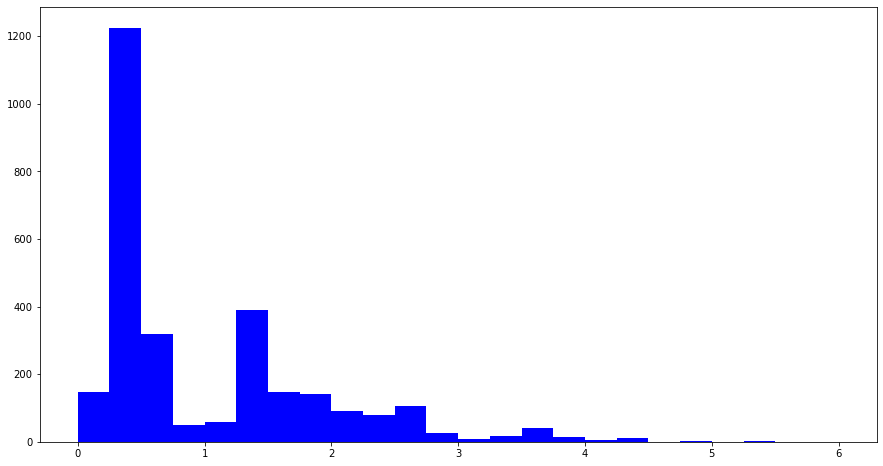

In [143]:
num_bins = 12
plt.figure(figsize =(15,8))
plt.hist(power['Global_active_power'].values, bins=np.arange(0, 6.25, 0.25), facecolor='blue')
plt.show()

### Plot 2

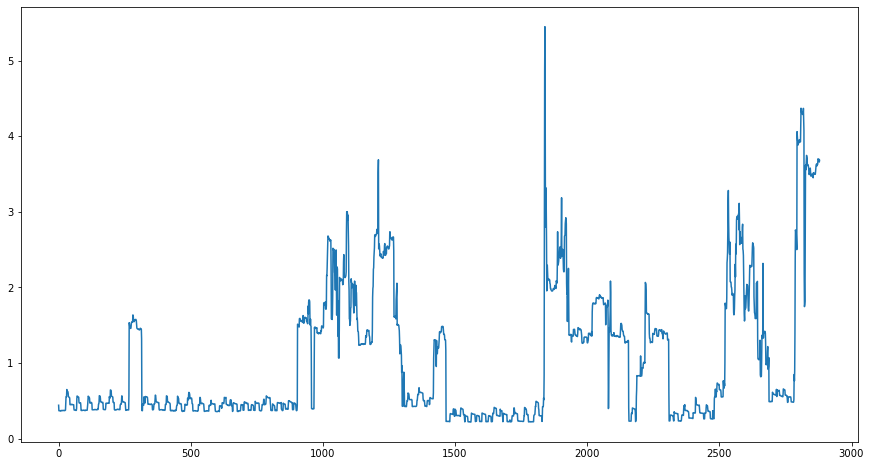

In [146]:
plt.figure(figsize =(15,8))
plt.plot(power['Global_active_power'].values)
plt.show()

### Plot 3

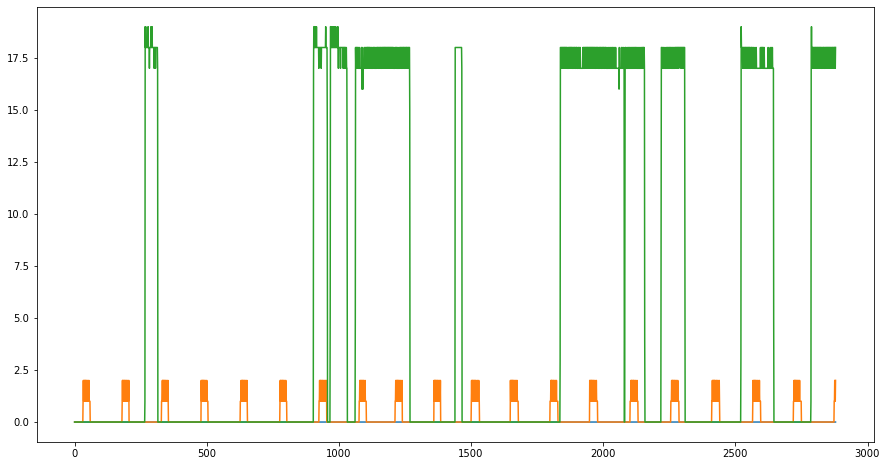

In [147]:
plt.figure(figsize =(15,8))
plt.plot(power['Sub_metering_1'].values)
plt.plot(power['Sub_metering_2'].values)
plt.plot(power['Sub_metering_3'].values)
plt.show()

### Plot 4

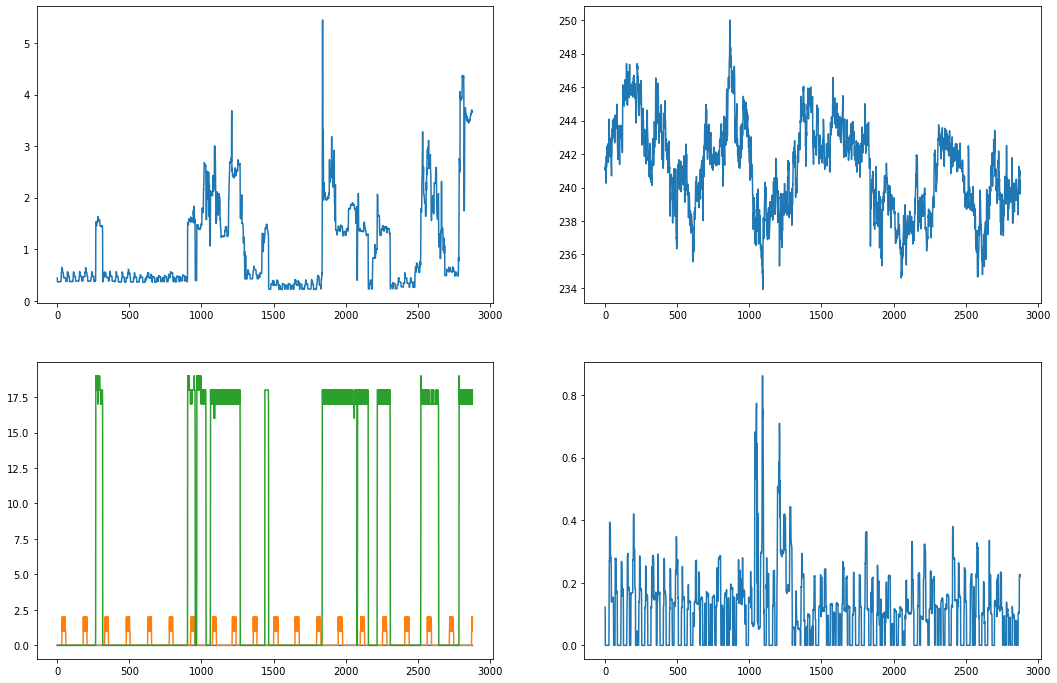

In [160]:
fig, axes = plt.subplots(2,2,figsize=(18,12))

axes[0, 0].plot(power['Global_active_power'].values)

axes[0, 1].plot(power['Voltage'].values)

axes[1, 0].plot(power['Sub_metering_1'].values)
axes[1, 0].plot(power['Sub_metering_2'].values)
axes[1, 0].plot(power['Sub_metering_3'].values)

axes[1, 1].plot(power['Global_reactive_power'].values)
plt.show()